In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [79]:
#reading train.csv
data = pd.read_csv('./titanic datasets/train.csv')
# show the actaul data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
# show the first few rows
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
# count the null values 
null_values = x_train.isnull().sum()
null_values

Pclass      0
Age         0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Ticket      0
dtype: int64

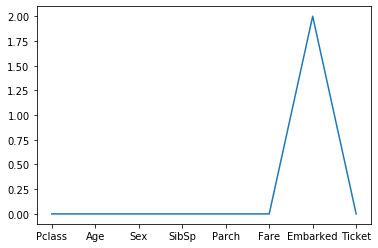

In [82]:
plt.plot(null_values)
plt.show()

## Data Processing

In [83]:
def handle_non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        
        def convert_to_int(val):10
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df


IndentationError: unexpected indent (<ipython-input-83-9ca6f32d81e8>, line 8)

In [84]:
y_target = data['Survived']
# Y_target.reshape(len(Y_target),1)
x_train = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()

NameError: name 'handle_non_numerical_data' is not defined

In [60]:
fare = pd.DataFrame(x_train['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,male,1,0,0.014151,S,A/5 21171
1,1,38.0,female,1,0,0.139136,C,PC 17599
2,3,26.0,female,0,0,0.015469,S,STON/O2. 3101282
3,1,35.0,female,1,0,0.103644,S,113803
4,3,35.0,male,0,0,0.015713,S,373450
...,...,...,...,...,...,...,...,...
886,2,27.0,male,0,0,0.025374,S,211536
887,1,19.0,female,0,0,0.058556,S,112053
888,3,NaN,female,1,2,0.045771,S,W./C. 6607
889,1,26.0,male,0,0,0.058556,C,111369


In [61]:
null_values = x_train.isnull().sum()
null_values

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Ticket        0
dtype: int64

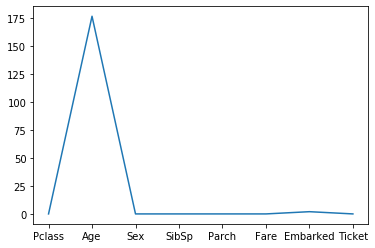

In [62]:
plt.plot(null_values)
plt.show()

In [64]:
# Fill the NAN values with the median values in the datasets
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(3))

Number of NULL values 0
   Pclass   Age     Sex  SibSp  Parch      Fare Embarked            Ticket
0       3  22.0    male      1      0  0.014151        S         A/5 21171
1       1  38.0  female      1      0  0.139136        C          PC 17599
2       3  26.0  female      0      0  0.015469        S  STON/O2. 3101282


c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
x_train['Sex'] = x_train['Sex'].replace('male', 0)
x_train['Sex'] = x_train['Sex'].replace('female', 1)
# print(type(x_train))
corr = x_train.corr()
corr.style.background_gradient()

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,Sex,SibSp,Parch,Fare
Pclass,1,-0.339898,-0.1319,0.0830814,0.0184427,-0.5495
Age,-0.339898,1,-0.0811625,-0.233296,-0.172482,0.0966884
Sex,-0.1319,-0.0811625,1,0.114631,0.245489,0.182333
SibSp,0.0830814,-0.233296,0.114631,1,0.414838,0.159651
Parch,0.0184427,-0.172482,0.245489,0.414838,1,0.216225
Fare,-0.5495,0.0966884,0.182333,0.159651,0.216225,1


In [66]:
def plot_corr(df,size=10):


    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
# plot_corr(x_train)
x_train.corr()
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare
Pclass,1,-0.339898,-0.1319,0.0830814,0.0184427,-0.5495
Age,-0.339898,1,-0.0811625,-0.233296,-0.172482,0.0966884
Sex,-0.1319,-0.0811625,1,0.114631,0.245489,0.182333
SibSp,0.0830814,-0.233296,0.114631,1,0.414838,0.159651
Parch,0.0184427,-0.172482,0.245489,0.414838,1,0.216225
Fare,-0.5495,0.0966884,0.182333,0.159651,0.216225,1


In [69]:
# Dividing the data into train and test data set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_target, test_size = 0.4, random_state = 40)

In [72]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'C'

In [75]:
print(clf.predict(X_test))
print("Accuracy: ",clf.score(X_test, Y_test))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [45]:
## Testing the model.
test_data = pd.read_csv('./titanic datasets/test.csv')
test_data.head(3)
# test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [46]:
### Preprocessing on the test data
test_data = test_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Embarked']]
test_data = handle_non_numerical_data(test_data)

fare = pd.DataFrame(test_data['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
test_data['Fare'] = newfare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Sex'] = test_data['Sex'].replace('male', 0)
test_data['Sex'] = test_data['Sex'].replace('female', 1)
print(test_data.head())


NameError: name 'handle_non_numerical_data' is not defined

In [47]:
print(clf.predict(test_data))

NameError: name 'clf' is not defined

In [48]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

ModuleNotFoundError: No module named 'sklearn'

In [49]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = clf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.axis([0.3,0.8,0.8,1])
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [50]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

NameError: name 'plt' is not defined

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

ModuleNotFoundError: No module named 'sklearn'

True positive: 293 (We predicted a positive result and it was positive)
True negative: 143 (We predicted a negative result and it was negative)
False positive: 34 (We predicted a positive result and it was negative)
False negative: 64 (We predicted a negative result and it was positive)